# Homework-1 (2021)

## Problem 1 (Linear Algebra) [30 points]
### Subproblem 1 (Operations in Matrix Multiplication) [10 points]
Given $A \in \mathbb{R}^{1000 \times 2}, B \in \mathbb{R}^{2 \times 1000}$ and $C \in \mathbb{R}^{1000 \times 1}$, evaluate the number of real number multiplications and additions to compute the product $ABC$ by the two procedures listed below:
- (AB)C
- A(BC)


### Subproblem 2 (Matrix and Vector Norms) [20 points]

- [5 points] Show that $||x||_{\infty} = \max_i |x_i|$ satisfies the axioms for a vector norm.(Refer [here](https://www.cis.upenn.edu/~cis515/cis515-11-sl4.pdf#page=2))
- [10 points] From the definition of a [matrix norm](https://en.wikipedia.org/wiki/Matrix_norm#Matrix_norms_induced_by_vector_norms) show that
$||A||_1 = \max_j \sum_i |a_{ij}|.$
- [5 points] If $||.||_F$ denotes the [Frobenius matrix norm](https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm), show that $||QA||_F = ||A||_F$ if $Q$ is an orthogonal matrix.


## Problem 2 (Interpolation) [40 points]

- [5 points] Consider the interpolant $p_n(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n$, then, if we want to fit this function to satisfy $\{x_i, f(x_i)\}_{\{i = 0\}}^{\{i = n\}}$, the interpolation condition becomes $p_n(x_i) = f(x_i)$. Using this condition, one can solve for coefficients $a_i$ by solving a matrix problem $V a = f$. Identify the structure of matrix $V$ in this case.
- [10 points] Alternatively, we can express $p_n(x)$ more generally as $p_n(x) = a_0 c_0(x) + a_1 c_1(x) + a_2 c_2(x) + \cdots + a_n c_n(x)$, where the functions $c_i(x)$ form a basis for the space of polynomials of degree $n$. What does $V$ look like now?  Consider the basis function choice $c_k(x) = L_{n, k}(x)$, known as the Lagrange basis defined as
$$L_{n, k} = \prod_{j = 0; j \neq k}^n \frac{x - x_j}{x_k - x_j}.$$
What does the resulting matrix look like for this choice of basis?

- [25 points] Write a Python code to construct the n-th polynomial interpolant to the function $f(x) = \sin(x) + \sin(x^2)$ on the interval $[0, 4]$ using equispaced and [Chebyshev](https://en.wikipedia.org/wiki/Chebyshev_nodes) nodes with both approaches listed above for $n = 8, 16, 32, 64, 128, 256, 512$. Compute the interpolation error for each $n$ and set of nodes by evaluating the interpolant on an equispaced fine grid of resolution $n = 1024$ on $[0, 4]$ and then computing the infinity norm of the difference between the interpolant and the exact values of f(x) at those points. Plot these error values against $n$ for each method and explain the results.(HINT: Compute the [condition number](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html) of $V$). A skeleton code has been provided for you below

In [ ]:
import numpy as np
import matplotlib.pyplot as pl

def f(x):
    """
    Function we want to numerically approximate
    """
    return np.sin(x) + np.sin(x**2)

def lagrangeBasis(x_i):
    """
    Returns a function that returns the Lagrange
    basis for the prescribed choice of points x_i
    that can be evaluated at any general point x
    """
    # TODO: Fill this to return the Lagrange basis

    return basisFunction

def monomialBasis(n):
    """
    Returns a function that returns the monomial
    basis upto the n-th degree that can be 
    evaluated at any general point x
    """
    def basisFunction(x):
        return x**np.arange(n + 1)

    return basisFunction

def returnV(c, x_i):
    # TODO: Fill this to return matrix V
    return V

def generateInterpolant(x_i, y_i, c):
    """
    Returns the interpolant that passes through points
    {x_i, y_i}

    Arguments:
    ----------
    x_i: np.ndarray
         Points where we have queried the original function

    y_i: np.ndarray
         Function value at x_i

    c  : func
         Function that returns the basis functions c_i(x) as
         stated in the 2nd part of the problem statement
    """
    V = returnV(c, x_i)
    
    # Obtaining coefficients by inverting matrix V:
    # Replace the ? with the RHS vector
    a = np.linalg.solve(V, ?)

    # Construct interpolant
    # p(x) = Σ a_i c_i(x)
    interpolant = lambda x:np.sum(a * c(x))
    
    return interpolant

IndentationError: ignored

In [ ]:
x_finegrid = np.linspace(0, 4, 1024)
# Resolutions to test for:
N = 2**np.arange(3, 10)
# Vectors to store errors:
err_eq_mon   = np.zeros(N.size)
err_eq_lag   = np.zeros(N.size)
err_cheb_mon = np.zeros(N.size)
err_cheb_lag = np.zeros(N.size)

for i in range(N.size):
    n = N[i]
    # Equispaced Grid Points:
    # Monomial Basis:
    x          = np.linspace(0, 4, n + 1)
    y          = f(x)
    basis      = monomialBasis(n)
    eq_mon_int = generateInterpolant(x, y, basis)
    
    # Lagrange Basis:
    basis      = lagrangeBasis(x)
    eq_lag_int = generateInterpolant(x, y, basis)

    # Chebyshev Grid Points:
    # TODO: Generate scaled chebyshev points in [0, 4]
    y            = f(x)
    basis        = monomialBasis(n)
    cheb_mon_int = generateInterpolant(x, y, basis)
    
    # Lagrange Basis:
    basis        = lagrangeBasis(x)
    cheb_lag_int = generateInterpolant(x, y, basis)

    err_eq_mon[i]   = abs(np.vectorize(eq_mon_int)(x_finegrid) - f(x_finegrid)).max()
    err_eq_lag[i]   = abs(np.vectorize(eq_lag_int)(x_finegrid) - f(x_finegrid)).max()
    err_cheb_mon[i] = abs(np.vectorize(cheb_mon_int)(x_finegrid) - f(x_finegrid)).max()
    err_cheb_lag[i] = abs(np.vectorize(cheb_lag_int)(x_finegrid) - f(x_finegrid)).max()

Interpret the plotted results below

In [ ]:
pl.loglog(N, err_eq_mon, '-o')
pl.loglog(N, err_eq_lag, '-o')
pl.loglog(N, err_cheb_mon, '-o')
pl.loglog(N, err_cheb_lag, '-o')

### Answer (Just for reference now)

I've put the complete answer below. Just so that we can add / remove more content as you deem necessary.

In [ ]:
import numpy as np
import matplotlib.pyplot as pl

def f(x):
    """
    Function we want to numerically approximate
    """
    return np.sin(x) + np.sin(x**2)

def lagrangeBasis(x_i):
    """
    Returns a function that returns the Lagrange
    basis for the prescribed choice of points x_i
    that can be evaluated at any general point x
    """
    def basisFunction(x):
        numerator   = (np.tile(x, (x_i.size, 1))   - x_i.reshape(1, -1))
        numerator   = numerator - np.diag(np.diag(numerator)) + np.eye(x_i.size)
        denominator = (x_i.reshape(-1, 1) - x_i.reshape(1, -1)) + np.eye(x_i.size)

        return np.product(numerator, axis = 1) / np.product(denominator, axis =1)
    
    return basisFunction

def monomialBasis(n):
    """
    Returns a function that returns the monomial
    basis upto the n-th degree that can be 
    evaluated at any general point x
    """
    def basisFunction(x):
        return x**np.arange(n + 1)

    return basisFunction

def returnV(c, x_i):
    n = x_i.size
    V = np.zeros([n, n])
    for i in range(n):
        V[i] = c(x_i[i])
    
    return V

def generateInterpolant(x_i, y_i, c):
    """
    Returns the interpolant that passes through points
    {x_i, y_i}

    Arguments:
    ----------
    x_i: np.ndarray
         Points where we have queried the original function

    y_i: np.ndarray
         Function value at x_i

    c  : func
         Function that returns the basis functions c_i(x) as
         stated in the 2nd part of the problem statement
    """
    V = returnV(c, x_i)
    
    # Obtaining coefficients by inverting matrix V:
    a = np.linalg.solve(V, y_i)

    # Construct interpolant
    # p(x) = Σ a_i c_i(x)
    interpolant = lambda x:np.sum(a * c(x))
    
    return interpolant

In [ ]:
x_finegrid = np.linspace(0, 4, 1024)
# Resolutions to test for:
N = 2**np.arange(3, 10)
# Vectors to store errors:
err_eq_mon   = np.zeros(N.size)
err_eq_lag   = np.zeros(N.size)
err_cheb_mon = np.zeros(N.size)
err_cheb_lag = np.zeros(N.size)

for i in range(N.size):
    n = N[i]
    # Equispaced Grid Points:
    # Monomial Basis:
    x          = np.linspace(0, 4, n + 1)
    y          = f(x)
    basis      = monomialBasis(n)
    eq_mon_int = generateInterpolant(x, y, basis)
    
    # Lagrange Basis:
    basis      = lagrangeBasis(x)
    eq_lag_int = generateInterpolant(x, y, basis)

    # Chebyshev Grid Points:
    x            = 2 * (np.polynomial.chebyshev.chebpts1(n + 1) + 1)
    y            = f(x)
    basis        = monomialBasis(n)
    cheb_mon_int = generateInterpolant(x, y, basis)
    
    # Lagrange Basis:
    basis        = lagrangeBasis(x)
    cheb_lag_int = generateInterpolant(x, y, basis)

    err_eq_mon[i]   = abs(np.vectorize(eq_mon_int)(x_finegrid) - f(x_finegrid)).max()
    err_eq_lag[i]   = abs(np.vectorize(eq_lag_int)(x_finegrid) - f(x_finegrid)).max()
    err_cheb_mon[i] = abs(np.vectorize(cheb_mon_int)(x_finegrid) - f(x_finegrid)).max()
    err_cheb_lag[i] = abs(np.vectorize(cheb_lag_int)(x_finegrid) - f(x_finegrid)).max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in power


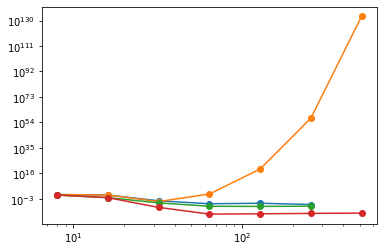

In [ ]:
pl.loglog(N, err_eq_mon, '-o')
pl.loglog(N, err_eq_lag, '-o')
pl.loglog(N, err_cheb_mon, '-o')
pl.loglog(N, err_cheb_lag, '-o')

## Problem 3 (Numerical Quadrature) [30 Points]

Write a Python code to numerically approximate the values of four integrals:
- $\int_0^1 4 \pi x \sin(20 \pi x) \cos (2 \pi x) dx = -20 / 99$
- $\int_0^1 \sin(2 \pi x) \cos (4 \pi x) dx = 0$
- $\int_0^5 G(x) dx = 15 / 2$, where
$$G(x) = \begin{cases}
    x + 1, & \text{for } x < 1 \\
    3 - x, & \text{for } 1 \leq x \leq 3 \\
    2, & \text{for } x > 3
  \end{cases}$$
- $\int_0^1 x^{5/4} dx = 4/9$

Compute each integral using a) the composite trapezium quadrature and b) Gauss-Legendre quadrature with $n = 16, 32, 64, 128, 256$. For each integral produce a plot showing the convergence of the error with $n$ for each of the three different methods. Comment.